**1. Importing libraries**

In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


**2. Data preparation**

In [20]:
Categories=['cats','dogs']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/drive/MyDrive/CATS DOGS - SVM/train'
#path which contains all the categories of images
for i in Categories:

	print(f'loading... category : {i}')
	path=os.path.join(datadir,i)
	for img in os.listdir(path):
		img_array=imread(os.path.join(path,img))
		img_resized=resize(img_array,(150,150,3))
		flat_data_arr.append(img_resized.flatten())
		target_arr.append(Categories.index(i))
	print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)


loading... category : cats
loaded category:cats successfully
loading... category : dogs
loaded category:dogs successfully


**3. Data Splitting**

In [3]:
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(557, 67501)

In [4]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

In [5]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=77, stratify=y)

# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
			'gamma':[0.0001,0.001,0.1,1],
			'kernel':['rbf','poly']}


**4. Model creation & Testing**

In [7]:
# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

#training the model
model.fit(x_train,y_train)

# Testing the model using the testing data
y_pred = model.predict(x_test)

**5. Accuracy**

In [8]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))



The model is 61.60714285714286% accurate
              precision    recall  f1-score   support

         cat       0.61      0.66      0.63        56
         dog       0.63      0.57      0.60        56

    accuracy                           0.62       112
   macro avg       0.62      0.62      0.62       112
weighted avg       0.62      0.62      0.62       112



**6. Prediction**

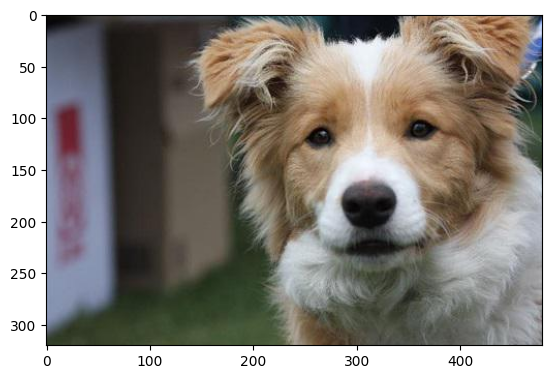

cats = 48.39789419152616%
dogs = 51.60210580847383%
The predicted image is : dogs


In [43]:
path='/content/drive/MyDrive/CATS DOGS - SVM/test/dogs/dog_177.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
	print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])